In [1]:
# Dependencies
import tweepy 
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from config import (consumer_key,consumer_secret,access_token,access_token_secret)


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target User Accounts
target_user = ("@BBC","@CBS","@CNN","@FOX","@nytimes")

# Added - Counter
counter = 1

# List for dictionaries of results
results_list = []
username_list = []
tweets_ago = []


# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_list=[]
date_list=[]

# Loop through each user
for user in target_user:

    # Added - counter inside the loop
    counter = 0

    # Loop through 5 pages of tweets (total 500 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            text= tweet["text"]
            date= tweet["created_at"]
            
        
            
            # Add each value to the appropriate list
            # Added - username_list to hold all of the news outlets
            username_list.append(user)
            
            # tweets_ago to get the number of tweets per outlet.
            # Shoould be 500 total, 100 per per outlet
            tweets_ago.append(counter)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweet_list.append(text)
            date_list.append(date)
            
            # Added - counter
            counter = counter + 1
            

# Create a dictionaty of results  
user_results = {
    # Added  - changed user to username_list, tweets_ago
    "Username": username_list,
    "Tweets Ago": tweets_ago,
    "Compound Score": compound_list,
    "Postive Score": positive_list,
    "Neutral Score": neutral_list,
    "Negative Score": negative_list,
    "Tweet_Text": tweet_list,
    "Tweet_Date": date_list
}


print(user_results)


{'Username': ['@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@BBC', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@CBS', '@

In [4]:
# Create DataFrame
results_df = pd.DataFrame(user_results).set_index("Username").round(3)
results_df

results_df.to_csv("results_df.csv")

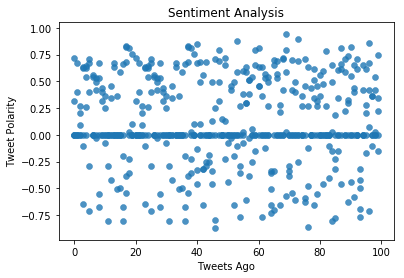

In [5]:
# Create plot
x_vals = results_df["Tweets Ago"]
#print(x_vals)

y_vals = results_df["Compound Score"]
#print(y_vals)

plt.title("Sentiment Analysis")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Create plot
plt.scatter(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

fig=plt.gcf()
plt.show()
fig.savefig("ScatterPlot")



TypeError: must be str, not float

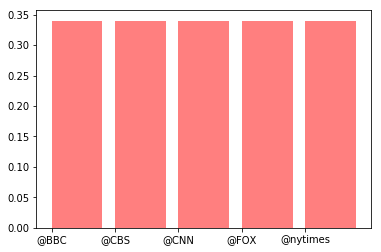

In [6]:
# Tell matplotlib that we will be making a bar chart

plt.bar(target_user,compound, color='r', alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [user+0.5 for user in target_user]
plt.xticks([tick_locations, "BBC","CBS","CNN","Fox","NYT"])

# Sets the x limits of the current chart
plt.xlim(-0.25, len(x_axis))

# Sets the y limits of the current chart
plt.ylim(-.20,.50)

# Give our chart some labels and a tile
plt.title("Media Sentiment")
plt.xlabel("News Station")
plt.ylabel("Tweet Polarity")

fig=plt.gcf()
plt.show()
fig.savefig("BarChart")